##Spam Text Classification



*   
*  



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x = ['which book is this', 'this is book and this is math']

In [ ]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [ ]:
count.toarray()  #BOW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'book', 'is', 'math', 'this', 'which']

In [ ]:
bow = pd.DataFrame(count.toarray(), columns = cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [ ]:
bow.shape

(2, 6)

##Term Frequency

In [ ]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [ ]:
bow.shape

(2, 6)

In [ ]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
  print(row[1])
  print()


and      0
book     1
is       1
math     0
this     1
which    1
Name: 0, dtype: int64

and      1
book     1
is       2
math     1
this     2
which    0
Name: 1, dtype: int64



In [ ]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
  for col in row[1].index:
    tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [ ]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


##Inverse Document Frequency IDF

idf = log( (1 + N)/(n + 1)

In [ ]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [ ]:
bb['is'].sum()

2

In [ ]:
cols = bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [ ]:
nz =[]
for col in cols:
  nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [ ]:
N = 2
idf = []
for index, col in enumerate(cols):
  idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [ ]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [ ]:
x

['which book is this', 'this is book and this is math']

##TFIDF TF * IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x

['which book is this', 'this is book and this is math']

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [ ]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [ ]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [ ]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


##Load Spam Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('spam.tsv', sep = '\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.shape

(5572, 4)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

##Balance Dataset 

In [ ]:
ham = df[df['label']== 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam = df[df['label']== 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
data = ham.append(spam, ignore_index= "True")
data.sample(5)

,label,message,length,punct
54,ham,"Hurry up, I've been weed-deficient for like th...",54,3
1352,spam,Latest Nokia Mobile or iPOD MP3 Player +£400 p...,123,8
486,ham,"Give her something to drink, if she takes it a...",127,4
130,ham,Takin a shower now but yeah I'll leave when I'...,52,2
790,spam,T-Mobile customer you may now claim your FREE ...,159,8


##Exploratory Data Analysis

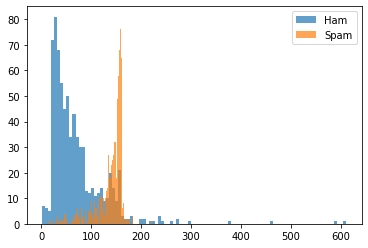

In [ ]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label ='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label ='Spam')
plt.legend()
plt.show()

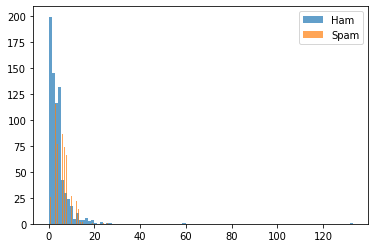

In [ ]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label ='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label ='Spam')
plt.legend()
plt.show()

##Data Preparation For Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data.head()

,label,message,length,punct
0,ham,Get ready for &lt;#&gt; inches of pleasure...,47,8
1,ham,"Hi hope u get this txt~journey hasnt been gd,n...",76,3
2,ham,Sat right? Okay thanks...,26,4
3,ham,A pure hearted person can have a wonderful smi...,198,13
4,ham,Y bishan lei... I tot ü say lavender?,38,4


In [ ]:
tfidf = TfidfVectorizer()
x= tfidf.fit_transform(data['message'])

In [ ]:
x = x.toarray()

In [ ]:
x.shape

(1494, 4537)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])


In [ ]:
x_train.shape, x_test.shape

((1195, 4537), (299, 4537))

##Training Your First Text Classifier

In [ ]:
clf = RandomForestClassifier( n_estimators = 100, n_jobs=-1)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[148,   2],
       [ 17, 132]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       150
        spam       0.99      0.89      0.93       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



##SVM

In [ ]:
clf = SVC(C =1000, gamma = 'auto')

In [ ]:
clf.fit(x_train, y_train)

SVC(C=1000, gamma='auto')

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[147,   3],
       [ 17, 132]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       150
        spam       0.98      0.89      0.93       149

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



##Test Model With Real Data

In [ ]:
clf

SVC(C=1000, gamma='auto')

In [ ]:
def predict(x):
  x = tfidf.transform([x])
  x = x.toarray()
  pred = clf.predict(x)
  return pred


In [ ]:
predict('hey, submit your assignment on time')

array(['ham'], dtype=object)

In [ ]:
predict('Congratulations! you have won a lottery')

array(['spam'], dtype=object)